# Copyright Netherlands eScience Center <br>
** Function     : Lead/Lag regression of eddy decomposition on OMET with vertical profiles in certain season** <br>
** Author       : Yang Liu ** <br>
** First Built  : 2018.12.12 ** <br>
** Last Update  : 2018.12.12 ** <br>
Description     : This notebook includes the result of the lag regression of eddies of kinetic energy on OMET.

It aims to unveil the relation between the climatological fields and OMET and try to illustrate how the ocean drives the atmosphere through the change of OMET.<br>
Return Values   : jpeg <br>
Caveats         : The eddies are normalied with dx at 60N.<br>

In [1]:
%matplotlib inline

import sys
sys.path.append("/home/ESLT0068/NLeSC/Computation_Modeling/Bjerknes/Scripts/META")
import numpy as np
import scipy
from netCDF4 import Dataset
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm # for color map
import os
import meta.statistics
import meta.visualizer

Initialization - Start with location of input and extraction of variables
Time span of each product:
- **ERA-Interim** 1979 - 2016
- **MERRA2**      1980 - 2016
- **JRA55**       1979 - 2015
- **ORAS4**       1958 - 2014
- **GLORYS2V3**   1993 - 2014
- **SODA3**       1980 - 2015

In [2]:
# constants
constant = {'g' : 9.80616,      # gravititional acceleration [m / s2]
            'R' : 6371009,      # radius of the earth [m]
            'cp': 1004.64,      # heat capacity of air [J/(Kg*K)]
            'Lv': 2264670,      # Latent heat of vaporization [J/Kg]
            'R_dry' : 286.9,    # gas constant of dry air [J/(kg*K)]
            'R_vap' : 461.5,    # gas constant for water vapour [J/(kg*K)]
            }

In [3]:
if __name__=="__main__":
    # sample
    ################################   Input zone  ######################################
    # specify data path
    datapath = '/home/ESLT0068/WorkFlow/Core_Database_AMET_OMET_reanalysis/warehouse_met'
    datapath_JRA55_fields = '/home/ESLT0068/WorkFlow/Core_Database_AMET_OMET_reanalysis/JRA55/regression'
    datapath_ORAS4_mask = '/home/ESLT0068/WorkFlow/Core_Database_AMET_OMET_reanalysis/ORAS4'
    output_path = '/home/ESLT0068/NLeSC/PhD/Paperwork/Article/MET_Feedback/figures/revision/subFigures'
    #####################################################################################
    print ('*********************** extract variables *************************')
    dataset_200hPa_eddy = Dataset(os.path.join(datapath_JRA55_fields,
                                        'model_jra_daily_v2_eddies_200hPa_point.nc'))
    dataset_300hPa_eddy = Dataset(os.path.join(datapath_JRA55_fields,
                                        'model_jra_daily_v2_eddies_300hPa_point.nc'))
#     dataset_400hPa_eddy = Dataset(os.path.join(datapath_ERAI_fields,
#                                         'model_daily_075_v2_eddies_400hPa_point.nc'))
    dataset_500hPa_eddy = Dataset(os.path.join(datapath_JRA55_fields,
                                        'model_jra_daily_v2_eddies_500hPa_point.nc'))
#     dataset_600hPa_eddy = Dataset(os.path.join(datapath_ERAI_fields,
#                                         'model_daily_075_v2_eddies_600hPa_point.nc'))
    dataset_750hPa_eddy = Dataset(os.path.join(datapath_JRA55_fields,
                                        'model_jra_daily_v2_eddies_750hPa_point.nc'))
    dataset_850hPa_eddy = Dataset(os.path.join(datapath_JRA55_fields,
                                        'model_jra_daily_v2_eddies_850hPa_point.nc'))
    dataset_E_vert = Dataset(os.path.join(datapath_JRA55_fields,
                             'pressure_jra_monthly_regress_1979_2017_vertProfile_E.nc')) 
    dataset_ORAS4_OMET = Dataset(os.path.join(datapath,
                                 'oras_model_monthly_1958_2017_omet.nc'))
    dataset_ORAS4_mask = Dataset(os.path.join(datapath_ORAS4_mask, 'mesh_mask.nc'))
    # extract time series from 1979 to 2016
    # from 20N - 90N
    # list of variables
    var_book = ['v2']
    var_op = 0
    # 4D fields [year, month, lat, lon]
    # eddies at certain height
    # zonal mean of eddies at certain height
    p200_transient_zonal = dataset_200hPa_eddy.variables['{}_transient_zonal'.format(var_book[var_op])][:-1,:,:]
    p200_standing_zonal = dataset_200hPa_eddy.variables['{}_standing_zonal'.format(var_book[var_op])][:-1,:,:]
    p300_transient_zonal = dataset_300hPa_eddy.variables['{}_transient_zonal'.format(var_book[var_op])][:-1,:,:]
    p300_standing_zonal = dataset_300hPa_eddy.variables['{}_standing_zonal'.format(var_book[var_op])][:-1,:,:]
#     p400_transient_zonal = dataset_400hPa_eddy.variables['{}_transient_zonal'.format(var_book[var_op])][:-1,:,:]
#     p400_standing_zonal = dataset_400hPa_eddy.variables['{}_standing_zonal'.format(var_book[var_op])][:-1,:,:]
    p500_transient_zonal = dataset_500hPa_eddy.variables['{}_transient_zonal'.format(var_book[var_op])][:-1,:,:]
    p500_standing_zonal = dataset_500hPa_eddy.variables['{}_standing_zonal'.format(var_book[var_op])][:-1,:,:]
#     p600_transient_zonal = dataset_600hPa_eddy.variables['{}_transient_zonal'.format(var_book[var_op])][:-1,:,:]
#     p600_standing_zonal = dataset_600hPa_eddy.variables['{}_standing_zonal'.format(var_book[var_op])][:-1,:,:]
    p750_transient_zonal = dataset_750hPa_eddy.variables['{}_transient_zonal'.format(var_book[var_op])][:-1,:,:]
    p750_standing_zonal = dataset_750hPa_eddy.variables['{}_standing_zonal'.format(var_book[var_op])][:-1,:,:]
    p850_transient_zonal = dataset_850hPa_eddy.variables['{}_transient_zonal'.format(var_book[var_op])][:-1,:,:]
    p850_standing_zonal = dataset_850hPa_eddy.variables['{}_standing_zonal'.format(var_book[var_op])][:-1,:,:]
    # zonal mean of overall transport at certain height
    p200_overall_zonal = dataset_200hPa_eddy.variables['{}_overall_zonal'.format(var_book[var_op])][:-1,:,:]
    p300_overall_zonal = dataset_300hPa_eddy.variables['{}_overall_zonal'.format(var_book[var_op])][:-1,:,:]
#     p400_overall_zonal = dataset_400hPa_eddy.variables['{}_overall_zonal'.format(var_book[var_op])][:-1,:,:]
    p500_overall_zonal = dataset_500hPa_eddy.variables['{}_overall_zonal'.format(var_book[var_op])][:-1,:,:]
#     p600_overall_zonal = dataset_600hPa_eddy.variables['{}_overall_zonal'.format(var_book[var_op])][:-1,:,:]
    p750_overall_zonal = dataset_750hPa_eddy.variables['{}_overall_zonal'.format(var_book[var_op])][:-1,:,:]
    p850_overall_zonal = dataset_850hPa_eddy.variables['{}_overall_zonal'.format(var_book[var_op])][:-1,:,:]    
    # 3D fields [year, month, lat]
    OMET_int_ORAS4 = dataset_ORAS4_OMET.variables['E_int'][21:-1,:,180:]/1000 # from Tera Watt to Peta Watt # start from 1979
    OMET_atl_int_ORAS4 = dataset_ORAS4_OMET.variables['E_atl_int'][21:-1,:,180:]/1000

    # other dimensions
    year_ORAS4 = dataset_ORAS4_OMET.variables['year'][21:-1]    # from 1979 to 2016
    latitude_OMET_ORAS4 = dataset_ORAS4_OMET.variables['latitude_aux'][180:]
    gphiv_OMET_ORAS4 = dataset_ORAS4_OMET.variables['gphiv'][180:,:]
    glamv_OMET_ORAS4 = dataset_ORAS4_OMET.variables['glamv'][180:,:]
    latitude_eddy = dataset_500hPa_eddy.variables['latitude'][:]
    longitude_eddy = dataset_500hPa_eddy.variables['longitude'][:]
    level = dataset_E_vert.variables['level'][:]
    mask_ORAS4 = dataset_ORAS4_mask.variables['vmask'][0,0,180:,:]
    # area weighted
    p200_transient_zonal_weight = np.zeros(p500_transient_zonal.shape, dtype=float) # unit W
    p200_standing_zonal_weight = np.zeros(p500_standing_zonal.shape, dtype=float)
    p300_transient_zonal_weight = np.zeros(p500_transient_zonal.shape, dtype=float) # unit W
    p300_standing_zonal_weight = np.zeros(p500_standing_zonal.shape, dtype=float)
#     p400_transient_zonal_weight = np.zeros(p500_transient_zonal.shape, dtype=float) # unit W
#     p400_standing_zonal_weight = np.zeros(p500_standing_zonal.shape, dtype=float)
    p500_transient_zonal_weight = np.zeros(p500_transient_zonal.shape, dtype=float) # unit W
    p500_standing_zonal_weight = np.zeros(p500_standing_zonal.shape, dtype=float)
#     p600_transient_zonal_weight = np.zeros(p500_transient_zonal.shape, dtype=float) # unit W
#     p600_standing_zonal_weight = np.zeros(p500_standing_zonal.shape, dtype=float)
    p750_transient_zonal_weight = np.zeros(p500_transient_zonal.shape, dtype=float) # unit W
    p750_standing_zonal_weight = np.zeros(p500_standing_zonal.shape, dtype=float)
    p850_transient_zonal_weight = np.zeros(p500_transient_zonal.shape, dtype=float) # unit W
    p850_standing_zonal_weight = np.zeros(p500_standing_zonal.shape, dtype=float)

    p200_overall_zonal_weight = np.zeros(p500_overall_zonal.shape, dtype=float)
    p300_overall_zonal_weight = np.zeros(p500_overall_zonal.shape, dtype=float)
#     p400_overall_zonal_weight = np.zeros(p500_overall_zonal.shape, dtype=float)
    p500_overall_zonal_weight = np.zeros(p500_overall_zonal.shape, dtype=float)
#     p600_overall_zonal_weight = np.zeros(p500_overall_zonal.shape, dtype=float)
    p750_overall_zonal_weight = np.zeros(p500_overall_zonal.shape, dtype=float)
    p850_overall_zonal_weight = np.zeros(p500_overall_zonal.shape, dtype=float)
    #size of the grid box
    dx = 2 * np.pi * constant['R'] * np.cos(2 * np.pi * latitude_eddy /
                                            360) / len(longitude_eddy) 
    for i in np.arange(len(latitude_eddy)):
        # apply the weight by latitude (weighted with dx at 60N)
        p200_transient_zonal_weight[:,:,i] = p200_transient_zonal[:,:,i]* dx[i] / dx[24]
        p200_standing_zonal_weight[:,:,i] = p200_standing_zonal[:,:,i]* dx[i] / dx[24]
        p300_transient_zonal_weight[:,:,i] = p300_transient_zonal[:,:,i]* dx[i] / dx[24]
        p300_standing_zonal_weight[:,:,i] = p300_standing_zonal[:,:,i]* dx[i] / dx[24]
#         p400_transient_zonal_weight[:,:,i] = p400_transient_zonal[:,:,i]* dx[i] / dx[40]
#         p400_standing_zonal_weight[:,:,i] = p400_standing_zonal[:,:,i]* dx[i] / dx[40]
        p500_transient_zonal_weight[:,:,i] = p500_transient_zonal[:,:,i]* dx[i] / dx[24]
        p500_standing_zonal_weight[:,:,i] = p500_standing_zonal[:,:,i]* dx[i] / dx[24]
#         p600_transient_zonal_weight[:,:,i] = p600_transient_zonal[:,:,i]* dx[i] / dx[72]
#         p600_standing_zonal_weight[:,:,i] = p600_standing_zonal[:,:,i]* dx[i] / dx[24]
        p750_transient_zonal_weight[:,:,i] = p750_transient_zonal[:,:,i]* dx[i] / dx[24]
        p750_standing_zonal_weight[:,:,i] = p750_standing_zonal[:,:,i]* dx[i] / dx[24]
        p850_transient_zonal_weight[:,:,i] = p850_transient_zonal[:,:,i]* dx[i] / dx[24]
        p850_standing_zonal_weight[:,:,i] = p850_standing_zonal[:,:,i]* dx[i] / dx[24]
        # apply the weight of latitude
        p200_overall_zonal_weight[:,:,i] = p200_overall_zonal[:,:,i]* dx[i] / dx[24]
        p300_overall_zonal_weight[:,:,i] = p300_overall_zonal[:,:,i]* dx[i] / dx[24]
#         p400_overall_zonal_weight[:,:,i] = p400_overall_zonal[:,:,i]* dx[i] / dx[24]
        p500_overall_zonal_weight[:,:,i] = p500_overall_zonal[:,:,i]* dx[i] / dx[24]
#         p600_overall_zonal_weight[:,:,i] = p600_overall_zonal[:,:,i]* dx[i] / dx[24]
        p750_overall_zonal_weight[:,:,i] = p750_overall_zonal[:,:,i]* dx[i] / dx[24]
        p850_overall_zonal_weight[:,:,i] = p850_overall_zonal[:,:,i]* dx[i] / dx[24]

*********************** extract variables *************************


In [7]:
    print (level)
    print(dx[24])
    print(latitude_eddy[24])

[   1    2    3    5    7   10   20   30   50   70  100  125  150  175
  200  225  250  300  350  400  450  500  550  600  650  700  750  775
  800  825  850  875  900  925  950  975 1000]
64180.223
60.0


Table for an easy lead / lag analysis of seasonal data <br>

|-11 |-10 | -9 | -8 | -7 | -6 | -5 | -4 | -3 | -2 | -1 |winter|
|----|----|----|----|----|----|----|----|----|----|----|------|
|JFM |FMA |MAM |AMJ |MJJ |JJA |JAS |ASO |SON |OND |NDJ |DJF   |

|-11 |-10 | -9 | -8 | -7 | -6 | -5 | -4 | -3 | -2 | -1 |summer|
|----|----|----|----|----|----|----|----|----|----|----|------|
|JAS |ASO |SON |OND |NDJ |DJF |JFM |FMA |MAM |AMJ |MJJ |JJA   |

In [4]:
    # simple calculator for seasonal lead/lag pairing
    lag_winter = ['DJF', 'JFM', 'FMA', 'MAM', 'AMJ', 'MJJ',
                  'JJA', 'JAS', 'ASO', 'SON', 'OND', 'NDJ']
    lag_summer = ['JJA', 'JAS', 'ASO', 'SON', 'OND', 'NDJ',
                  'DJF', 'JFM', 'FMA', 'MAM', 'AMJ', 'MJJ']

Be cautious about the time across the year! The definition of lead/lag is the opposite to the one defined in the package.<br>
If y (fields) leads:<br>
winter (DJF) lag -1 : x[2:] & y[1:-1]<br>
winter (DJF) lag -2 : x[2:] & y[:-2]<br>
winter (DJF) lag -3 : x[2:] & y[:-2]<br>
...<br>
winter (DJF) lag -12 : x[2:] & y[:-2]<br>
...<br>
..........................................<br>
If x (MET) leads:<br>
winter (DJF) lag +1 : x[2:-1] & y[3:]<br>
winter (DJF) lag +2 : x[2:-1] & y[3:]<br>
...<br>
winter (DJF) lag +10 : x[2:-1] & y[3:]<br>
winter (DJF) lag +11 : x[2:-2] & y[4:]<br>
......................................................................<br>
If y (fields) leads:<br>
summer (JJA) lag -1 : x & y <br>
... <br>
summer (JJA) lag -5 : x & y <br>
summer (JJA) lag -6 : x[3:] & y[2:-1] <br>
summer (JJA) lag -7 : x[3:] & y[1:-2] <br>
summer (JJA) lag -8 : x[3:] & y[:-3] <br>
...<br>
summer (JJA) lag -12 : x[3:] & y[:-3] <br>
..........................................<br>
If x (MET) leads:<br>
summer (JJA) lag +1 : x & y <br>
... <br>
summer (JJA) lag +5 : x[:-1] & y[1:] <br>
summer (JJA) lag +6 : x[:-2] & y[2:] <br>
summer (JJA) lag +7 : x[:-3] & y[3:] <br>
...
summer (JJA) lag +11 : x[:-3] & y[3:] <br>

***********!@#$%^&*     Vertical Profile of zonal mean eddies   !@#$%^&***********
=====   p 200 300 400 500 600 750 850 eddy transient zonal + winter (DJF)   ======
The input data does not have the dimension of month.
The output anomaly time series only contains one dimension for time!
The input data does not have the dimension of month.
The output anomaly time series only contains one dimension for time!
One time series is regressed on a 1D field.
The input data does not have the dimension of month.
The output anomaly time series only contains one dimension for time!
One time series is regressed on a 1D field.
The input data does not have the dimension of month.
The output anomaly time series only contains one dimension for time!
One time series is regressed on a 1D field.
The input data does not have the dimension of month.
The output anomaly time series only contains one dimension for time!
One time series is regressed on a 1D field.
The input data does not have the dimension of mo

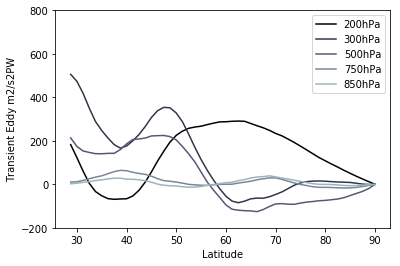

In [5]:
    print ('***********!@#$%^&*     Vertical Profile of zonal mean eddies   !@#$%^&***********')
    print ('=====   p 200 300 400 500 600 750 850 eddy transient zonal + winter (DJF)   ======')
    lag = 1
    OMET_season_series = meta.statistics.operator.seasons(OMET_atl_int_ORAS4[:,:,53],
                                                          span='DJF', Dim_month=True)    
    stat_OMET_ORAS4 = meta.statistics.operator(OMET_season_series[2:-1])
    stat_OMET_ORAS4.anomaly(Dim_month=False)
    stat_OMET_ORAS4.detrend()
    stat_OMET_ORAS4.lowpass(window=30, obj='detrend')
    p200_eddy_season_series = meta.statistics.operator.seasons(p200_transient_zonal_weight[:],
                                                               span=lag_winter[lag], Dim_month=True)
    stat_p200_eddy = meta.statistics.operator(p200_eddy_season_series[3:,:])
    stat_p200_eddy.anomaly(Dim_month=False)
    stat_p200_eddy.detrend()
    stat_p200_eddy.lowpass(window=30, obj='detrend')
    k_p200, r, p = meta.statistics.operator.linearRegress(stat_OMET_ORAS4._lowpass,
                                                          stat_p200_eddy._lowpass)
    p300_eddy_season_series = meta.statistics.operator.seasons(p300_transient_zonal_weight[:],
                                                               span=lag_winter[lag], Dim_month=True)
    stat_p300_eddy = meta.statistics.operator(p300_eddy_season_series[3:,:])
    stat_p300_eddy.anomaly(Dim_month=False)
    stat_p300_eddy.detrend()
    stat_p300_eddy.lowpass(window=30, obj='detrend')
    k_p300, r, p = meta.statistics.operator.linearRegress(stat_OMET_ORAS4._lowpass,
                                                          stat_p300_eddy._lowpass)
#     p400_eddy_season_series = meta.statistics.operator.seasons(p400_transient_zonal_weight[:],
#                                                                span=lag_winter[lag], Dim_month=True)
#     stat_p400_eddy = meta.statistics.operator(p400_eddy_season_series[3:,:])
#     stat_p400_eddy.anomaly(Dim_month=False)
#     stat_p400_eddy.detrend()
#     stat_p400_eddy.lowpass(window=30, obj='detrend')
#     k_p400, r, p = meta.statistics.operator.linearRegress(stat_OMET_ORAS4._lowpass,
#                                                           stat_p400_eddy._lowpass)
    p500_eddy_season_series = meta.statistics.operator.seasons(p500_transient_zonal_weight[:],
                                                               span=lag_winter[lag], Dim_month=True)
    stat_p500_eddy = meta.statistics.operator(p500_eddy_season_series[3:,:])
    stat_p500_eddy.anomaly(Dim_month=False)
    stat_p500_eddy.detrend()
    stat_p500_eddy.lowpass(window=30, obj='detrend')
    k_p500, r, p = meta.statistics.operator.linearRegress(stat_OMET_ORAS4._lowpass,
                                                          stat_p500_eddy._lowpass)
#     p600_eddy_season_series = meta.statistics.operator.seasons(p600_transient_zonal_weight[:],
#                                                                span=lag_winter[lag], Dim_month=True)
#     stat_p600_eddy = meta.statistics.operator(p600_eddy_season_series[3:,:])
#     stat_p600_eddy.anomaly(Dim_month=False)
#     stat_p600_eddy.detrend()
#     stat_p600_eddy.lowpass(window=30, obj='detrend')
#     k_p600, r, p = meta.statistics.operator.linearRegress(stat_OMET_ORAS4._lowpass,
#                                                           stat_p600_eddy._lowpass)
    p750_eddy_season_series = meta.statistics.operator.seasons(p750_transient_zonal_weight[:],
                                                               span=lag_winter[lag], Dim_month=True)
    stat_p750_eddy = meta.statistics.operator(p750_eddy_season_series[3:,:])
    stat_p750_eddy.anomaly(Dim_month=False)
    stat_p750_eddy.detrend()
    stat_p750_eddy.lowpass(window=30, obj='detrend')
    k_p750, r, p = meta.statistics.operator.linearRegress(stat_OMET_ORAS4._lowpass,
                                                          stat_p750_eddy._lowpass)
    p850_eddy_season_series = meta.statistics.operator.seasons(p850_transient_zonal_weight[:],
                                                               span=lag_winter[lag], Dim_month=True)
    stat_p850_eddy = meta.statistics.operator(p850_eddy_season_series[3:,:])
    stat_p850_eddy.anomaly(Dim_month=False)
    stat_p850_eddy.detrend()
    stat_p850_eddy.lowpass(window=30, obj='detrend')
    k_p850, r, p = meta.statistics.operator.linearRegress(stat_OMET_ORAS4._lowpass,
                                                          stat_p850_eddy._lowpass)
    fig = plt.figure()
    colormap=cm.bone(np.linspace(0,1,14))
    # weighted by pressure level
    plt.plot(latitude_eddy[:50], k_p200[:50]  * 150/150, color=colormap[0], label='200hPa')
    plt.plot(latitude_eddy[:50], k_p300[:50]  * 150/150, color=colormap[3], label='300hPa')
    #plt.plot(latitude_eddy, k_p400  * (level[19]-level[18])/(level[14]-level[13]), color=colormap[1], label='400hPa')
    plt.plot(latitude_eddy[:50], k_p500[:50]  * 225/150, color=colormap[5], label='500hPa')
    #plt.plot(latitude_eddy, k_p600  * (level[23]-level[22])/(level[14]-level[13]), color=colormap[1], label='600hPa')
    plt.plot(latitude_eddy[:50], k_p750[:50]  * 175/150, color=colormap[7], label='750hPa')
    plt.plot(latitude_eddy[:50], k_p850[:50]  * 125/150, color=colormap[9], label='850hPa')
    plt.xlabel("Latitude")
    plt.legend()
    plt.ylabel("Transient Eddy m2/s2PW")
    ax = plt.gca()
    ax.set_ylim(-200, 800)
    plt.show()
    fig.savefig(os.path.join(output_path,'regCoef_ORAS4_atl_OMET_60N_lag_{}_JRA55_eddy_{}_transient_zonal_DJF_decadal_mean.png'.format(lag,var_book[var_op])),dpi=150)
    plt.close(fig)

***********!@#$%^&*     Vertical Profile of zonal mean eddies   !@#$%^&***********
=====   p 200 300 400 500 600 750 850 eddy standing zonal + winter (DJF)   ======
The input data does not have the dimension of month.
The output anomaly time series only contains one dimension for time!
The input data does not have the dimension of month.
The output anomaly time series only contains one dimension for time!
One time series is regressed on a 1D field.
The input data does not have the dimension of month.
The output anomaly time series only contains one dimension for time!
One time series is regressed on a 1D field.
The input data does not have the dimension of month.
The output anomaly time series only contains one dimension for time!
One time series is regressed on a 1D field.
The input data does not have the dimension of month.
The output anomaly time series only contains one dimension for time!
One time series is regressed on a 1D field.
The input data does not have the dimension of mon

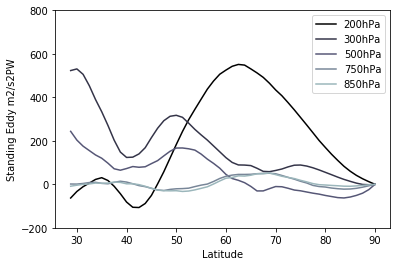

In [6]:
    print ('***********!@#$%^&*     Vertical Profile of zonal mean eddies   !@#$%^&***********')
    print ('=====   p 200 300 400 500 600 750 850 eddy standing zonal + winter (DJF)   ======')
    lag = 1
    OMET_season_series = meta.statistics.operator.seasons(OMET_atl_int_ORAS4[:,:,53],
                                                          span='DJF', Dim_month=True)    
    stat_OMET_ORAS4 = meta.statistics.operator(OMET_season_series[2:-1])
    stat_OMET_ORAS4.anomaly(Dim_month=False)
    stat_OMET_ORAS4.detrend()
    stat_OMET_ORAS4.lowpass(window=30, obj='detrend')
    p200_eddy_season_series = meta.statistics.operator.seasons(p200_standing_zonal_weight[:],
                                                               span=lag_winter[lag], Dim_month=True)
    stat_p200_eddy = meta.statistics.operator(p200_eddy_season_series[3:,:])
    stat_p200_eddy.anomaly(Dim_month=False)
    stat_p200_eddy.detrend()
    stat_p200_eddy.lowpass(window=30, obj='detrend')
    k_p200, r, p = meta.statistics.operator.linearRegress(stat_OMET_ORAS4._lowpass,
                                                          stat_p200_eddy._lowpass)
    p300_eddy_season_series = meta.statistics.operator.seasons(p300_standing_zonal_weight[:],
                                                               span=lag_winter[lag], Dim_month=True)
    stat_p300_eddy = meta.statistics.operator(p300_eddy_season_series[3:,:])
    stat_p300_eddy.anomaly(Dim_month=False)
    stat_p300_eddy.detrend()
    stat_p300_eddy.lowpass(window=30, obj='detrend')
    k_p300, r, p = meta.statistics.operator.linearRegress(stat_OMET_ORAS4._lowpass,
                                                          stat_p300_eddy._lowpass)
#     p400_eddy_season_series = meta.statistics.operator.seasons(p400_standing_zonal_weight[:],
#                                                                span=lag_winter[lag], Dim_month=True)
#     stat_p400_eddy = meta.statistics.operator(p400_eddy_season_series[3:,:])
#     stat_p400_eddy.anomaly(Dim_month=False)
#     stat_p400_eddy.detrend()
#     stat_p400_eddy.lowpass(window=30, obj='detrend')
#     k_p400, r, p = meta.statistics.operator.linearRegress(stat_OMET_ORAS4._lowpass,
#                                                           stat_p400_eddy._lowpass)
    p500_eddy_season_series = meta.statistics.operator.seasons(p500_standing_zonal_weight[:],
                                                               span=lag_winter[lag], Dim_month=True)
    stat_p500_eddy = meta.statistics.operator(p500_eddy_season_series[3:,:])
    stat_p500_eddy.anomaly(Dim_month=False)
    stat_p500_eddy.detrend()
    stat_p500_eddy.lowpass(window=30, obj='detrend')
    k_p500, r, p = meta.statistics.operator.linearRegress(stat_OMET_ORAS4._lowpass,
                                                          stat_p500_eddy._lowpass)
#     p600_eddy_season_series = meta.statistics.operator.seasons(p600_standing_zonal_weight[:],
#                                                                span=lag_winter[lag], Dim_month=True)
#     stat_p600_eddy = meta.statistics.operator(p600_eddy_season_series[3:,:])
#     stat_p600_eddy.anomaly(Dim_month=False)
#     stat_p600_eddy.detrend()
#     stat_p600_eddy.lowpass(window=30, obj='detrend')
#     k_p600, r, p = meta.statistics.operator.linearRegress(stat_OMET_ORAS4._lowpass,
#                                                           stat_p600_eddy._lowpass)
    p750_eddy_season_series = meta.statistics.operator.seasons(p750_standing_zonal_weight[:],
                                                               span=lag_winter[lag], Dim_month=True)
    stat_p750_eddy = meta.statistics.operator(p750_eddy_season_series[3:,:])
    stat_p750_eddy.anomaly(Dim_month=False)
    stat_p750_eddy.detrend()
    stat_p750_eddy.lowpass(window=30, obj='detrend')
    k_p750, r, p = meta.statistics.operator.linearRegress(stat_OMET_ORAS4._lowpass,
                                                          stat_p750_eddy._lowpass)
    p850_eddy_season_series = meta.statistics.operator.seasons(p850_standing_zonal_weight[:],
                                                               span=lag_winter[lag], Dim_month=True)
    stat_p850_eddy = meta.statistics.operator(p850_eddy_season_series[3:,:])
    stat_p850_eddy.anomaly(Dim_month=False)
    stat_p850_eddy.detrend()
    stat_p850_eddy.lowpass(window=30, obj='detrend')
    k_p850, r, p = meta.statistics.operator.linearRegress(stat_OMET_ORAS4._lowpass,
                                                          stat_p850_eddy._lowpass)
    fig = plt.figure()
    # there is a bug for the E eddy decomposition
    # g has been divided by each variable
    # we should compensate it here
    colormap=cm.bone(np.linspace(0,1,14))
    plt.plot(latitude_eddy[:50], k_p200[:50] * 150/150, color=colormap[0], label='200hPa')
    plt.plot(latitude_eddy[:50], k_p300[:50] * 150/150, color=colormap[3], label='300hPa')
    #plt.plot(latitude_eddy, k_p400 * (level[19]-level[18])/(level[14]-level[13]), color=colormap[0], label='400hPa')
    plt.plot(latitude_eddy[:50], k_p500[:50] * 225/150, color=colormap[5], label='500hPa')
    #plt.plot(latitude_eddy, k_p600 * (level[23]-level[22])/(level[14]-level[13]), color=colormap[0], label='600hPa')
    plt.plot(latitude_eddy[:50], k_p750[:50] * 175/150, color=colormap[7], label='750hPa')
    plt.plot(latitude_eddy[:50], k_p850[:50] * 125/150, color=colormap[9], label='850hPa')
    plt.xlabel("Latitude")
    plt.legend()
    plt.ylabel("Standing Eddy m2/s2PW")
    ax = plt.gca()
    ax.set_ylim(-200, 800)
    plt.show()
    fig.savefig(os.path.join(output_path,'regCoef_ORAS4_atl_OMET_60N_lag_{}_JRA55_eddy_{}_standing_zonal_DJF_decadal_mean.png'.format(lag,var_book[var_op])),dpi=150)
    plt.close(fig)

Be cautious about the time across the year! The definition of lead/lag is the opposite to the one defined in the package.<br>
If y (fields) leads:<br>
winter (DJF) lag -1 : x[2:] & y[1:-1]<br>
winter (DJF) lag -2 : x[2:] & y[:-2]<br>
winter (DJF) lag -3 : x[2:] & y[:-2]<br>
...<br>
winter (DJF) lag -12 : x[2:] & y[:-2]<br>
...<br>
..........................................<br>
If x (MET) leads:<br>
winter (DJF) lag +1 : x[2:-1] & y[3:]<br>
winter (DJF) lag +2 : x[2:-1] & y[3:]<br>
...<br>
winter (DJF) lag +10 : x[2:-1] & y[3:]<br>
winter (DJF) lag +11 : x[2:-2] & y[4:]<br>
......................................................................<br>
If y (fields) leads:<br>
summer (JJA) lag -1 : x & y <br>
... <br>
summer (JJA) lag -5 : x & y <br>
summer (JJA) lag -6 : x[3:] & y[2:-1] <br>
summer (JJA) lag -7 : x[3:] & y[1:-2] <br>
summer (JJA) lag -8 : x[3:] & y[:-3] <br>
...<br>
summer (JJA) lag -12 : x[3:] & y[:-3] <br>
..........................................<br>
If x (MET) leads:<br>
summer (JJA) lag +1 : x & y <br>
... <br>
summer (JJA) lag +5 : x[:-1] & y[1:] <br>
summer (JJA) lag +6 : x[:-2] & y[2:] <br>
summer (JJA) lag +7 : x[:-3] & y[3:] <br>
...
summer (JJA) lag +11 : x[:-3] & y[3:] <br>